# Tarea 3
**( Ejecicio del cuaderno: Mapeos en 1d)**

Claudio Pierard

---

**NOTA** Los ejercicios de este capítulo consituyen la tarea 3. Estos ejercicios involucran que ustedes escriban código que debe ejecutarse correctamente para responder las preguntas que se formulan en los ejercicios. El código debe estar correctamente documentada o al menos comentado, y en general se deben definir funciones que realicen cosas concretas.

**Fecha límite de envío inicial del PR:** lunes 12 de septiembre

**Fecha límite de aceptación del PR:** lunes 26 de septiembre

---

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


In [1]:
using Plots, PlotRecipes, LaTeXStrings
# Esto define a `PyPlot.jl` como el *backend* que usaremos
# Puede tardar un poco en cargarse, especialmente la primer vez que se usa.
pyplot()

    +(AbstractArray, DataArrays.DataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Plots.PyPlotBackend()

In [2]:
"""
    iterator(f::Function, n::Int, x0)
    OUT: pasos, orbitas

La función toma una función `f`, el número de pasos `n` y la condición inicial `x0`, e itera n veces la función
comenzando por `x0`. Regresa un arreglo con los pasos y otro arreglo con las orbitas, resultado de iterarar la función
n veces.
"""
function iterator(f::Function, n::Int, x0)

    orbitas = Float64[x0]
    pasos = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(orbitas[i])
        push!(orbitas, x_new)
        push!(pasos, i)

    end

    return pasos, orbitas

end

iterator (generic function with 1 method)

In [3]:
F(x) = x^2 - 2  #Defino la función especificada en la pregunta 1.

F (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



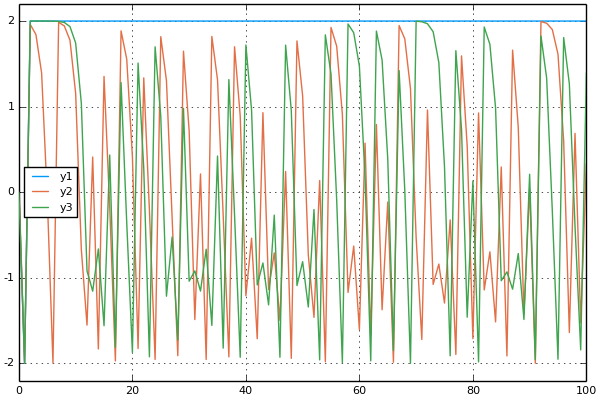

In [4]:
n_0, orbit_0 = iterator(F, 100, 0)
n_1, orbit_1 = iterator(F, 100, 0.1)
n_2, orbit_2 = iterator(F, 100,0.001 )
plot(n_0, orbit_0, ylim = (-2.2, 2.2))
plot!(n_1, orbit_1)
plot!(n_2, orbit_2)

**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [5]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal. Está función la definió Luis en clase.
"""

function iteramapeo(f, x0, n) #esto me lo robo de Luis.
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

In [6]:
"""
        cobweb_plot(f::Function, x0, rangex, n)

Función que hace el mapeo tipo cobweb. Este se usa cuando el plot no se a definido.
"""

function cobweb_plot(f::Function, x0, rangex, n)

    xx, fx = iteramapeo(f, x0, n)
    
    
    plot(rangex, f, xaxis=(L"x", (rangex[1], rangex[end])), yaxis=L"F(x)")
    plot!(rangex, identity)
    plot!(xx, fx, marker=(:dot, 3, 0.4))

end
"""
        cobweb_plot!(f::Function, x0, rangex, n)

Función que agrega un `plot!` a `cobweb_plot`. No funciona sin haber hecho primero un `cobweb_plot` con los mismos
parámetros de que `cobweb_plot!`.
"""

function cobweb_plot!(f::Function, x0, rangex, n)

    xx, fx = iteramapeo(f, x0, n)
    
    plot!(xx, fx, marker=(:dot, 3, 0.4))

end

cobweb_plot! (generic function with 1 method)

In [7]:
?cobweb_plot

search: cobweb_plot cobweb_plot!



```
    cobweb_plot(f::Function, x0, rangex, n)
```

Función que hace el mapeo tipo cobweb. Este se usa cuando el plot no se a definido.


In [8]:
H(x) = sqrt(x)

H (generic function with 1 method)


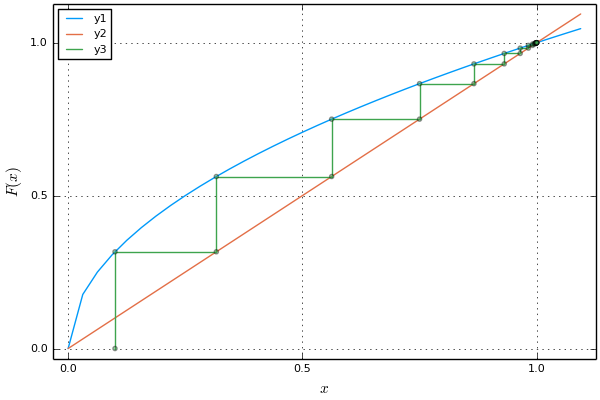

In [36]:
cobweb_plot(H, 0.1, 0:1/32:1.1, 15)

**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 


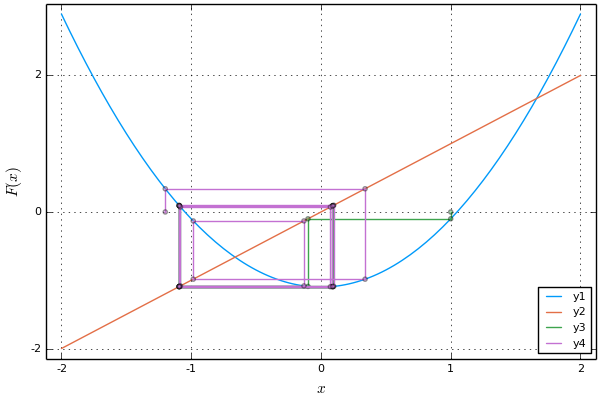

In [10]:
F(x) = x^2 - 1.1
cobweb_plot(F, 1.0, -2:1/32:2, 10)
cobweb_plot!(F, -1.2, -2:1/32:2, 10)
#cobweb_plot!(F, 1.6, -2:1/32:2, 10)

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

#### 1. $F_1(x) = \frac{1}{3x}$. 


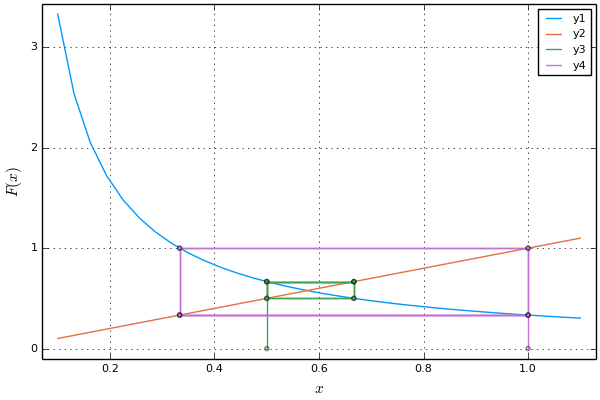

In [11]:
F1(x) = 1 / (3*x)
cobweb_plot(F1, 0.5, 0.1:1/32:1.1, 5)
cobweb_plot!(F1, 1.0, 0.1:1/32:1.1, 5)

#### 2. $F_2(x) = -\frac{x^5}{5}$.

In [12]:
F2(x) = - x^5 / 5
F3(x) = x/2 - 2

F3 (generic function with 1 method)


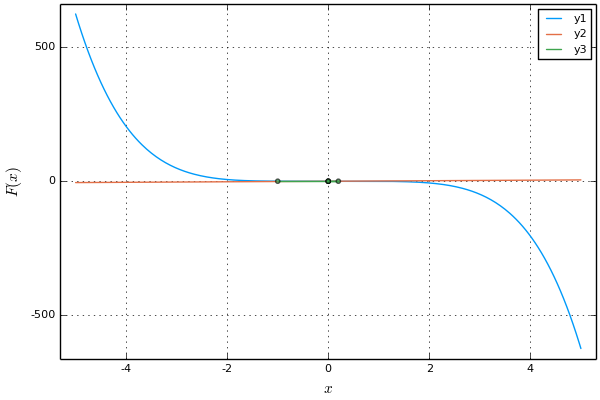

In [13]:
cobweb_plot(F2, -1.0, -5:1/32:5, 5)

#### 3. $F_3(x) = \frac{x}{2}-2$.


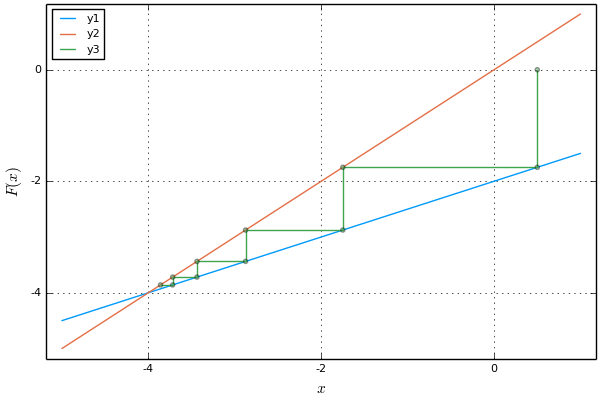

In [14]:
cobweb_plot(F3, 0.5, -5:1/32:1, 5)

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [15]:
F(x) = x^2 - 2  #Función que se pide iterar en el ejercicio

xi = 4*rand() - 2 #Esto genera un número al azar entre [-2,2] 

0.4680851926264671

In [16]:
?iterator

search: iterator Iterators Interpolations PositiveFactorizations isinteractive



```
iterator(f::Function, n::Int, x0)
OUT: pasos, orbitas
```

La función toma una función `f`, el número de pasos `n` y la condición inicial `x0`, e itera n veces la función comenzando por `x0`. Regresa un arreglo con los pasos y otro arreglo con las orbitas, resultado de iterarar la función n veces.


In [17]:
ns, orbita = iterator(F, 20000, xi)

([0,1,2,3,4,5,6,7,8,9  …  19991,19992,19993,19994,19995,19996,19997,19998,19999,20000],[0.468085,-1.7809,1.17159,-0.627373,-1.6064,0.580529,-1.66299,0.765522,-1.41398,-0.00067169  …  -1.74269,1.03698,-0.924667,-1.14499,-0.688994,-1.52529,0.326501,-1.8934,1.58495,0.512074])


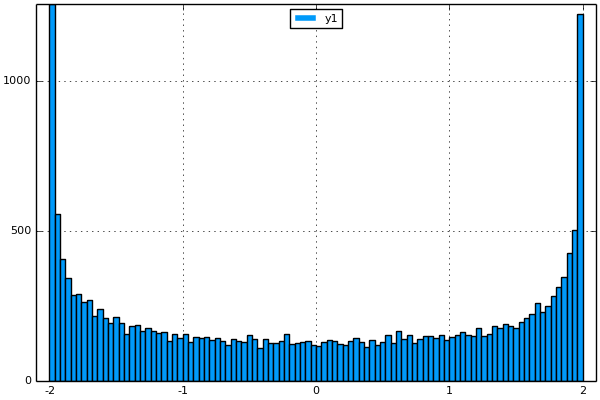

In [18]:
histogram(orbita,nbins=100, xlim=(-2.1,2.1))


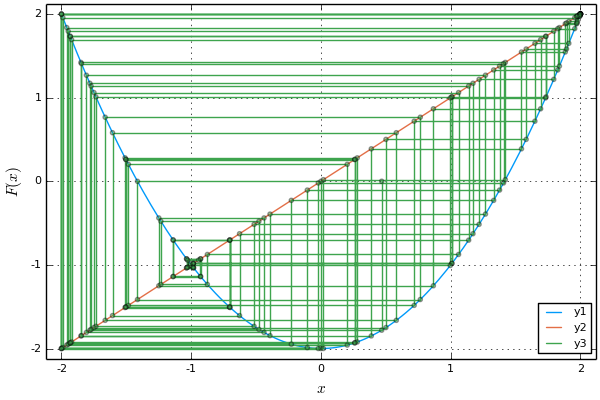

In [56]:
cobweb_plot(F, xi, -2:1/32:2, 100)

# Puntos fijos

Como dijimos antes, el análisis gráfico es útil pero no necesariamente riguroso. 

Un resultado riguroso (¡teorema!) que es útil para encontrar puntos fijos es el **teorema del valor intermedio**:

Supongamos que $F:[a,b]\to\mathbb{R}$ es *continua*, y que $y_0$ se encuentra entre $F(a)$ y $F(b)$. Entonces, existe un punto en $x_0\in[a,b]$ tal que $F(x_0)=y_0$.



Una consecuencia de este teorema es el teorema del punto fijo.

**Teorema del punto fijo**

Supongamos que $F:[a,b]\to[a,b]$ es *continua*. Entonces, existe un punto para $F$ en $[a,b]$, entonces existe un punto $x_0$ que está en $[a,b]$ tal que $F(x_0) = x_0.$

Algunos comentarios:

- El teorema asienta la existencia de un punto fijo; puede haber más.

- El teorema asume que $F$ es *continua* y que mapea al interval $[a,b]$ en si mismo.

- El intervalo $[a,b]$ es *cerrado*.

- El teorema **no** dice cómo encontrar a los puntos fijos.

La prueba se basa en aplicar el teorema del punto intermedio a la función $H(x)=F(x)-x$ y mostrar que existe un valor $x_0$ tal que $H(x_0)=0$. $H(x)$ es continua en el intervalo $[a,b]$ (así que se satisfacen las hipótesis del teorema del punto intermedio) y satisface $H(a) = F(a)-a \ge 0$ y $H(b)=F(b)-b\le 0$. (Estas propiedades se satisfacen ya que $F:[a,b]\to[a,b]$. 

Como vimos en los ejercicios, los puntos fijos aveces *atraen* puntos cercanos, a veces los *repelen*, y otras veces hay cierta atracción o repulsión.

A fin de entender las cosas, consideremos el siguiente mapeo *lineal*:

\begin{equation}
F_\alpha(x) = \alpha x,
\end{equation}

con $0<\alpha <1$.

*Obviamente*, $x^*=0$ es un punto fijo del mapeo.

In [20]:
# Definición del mapeo
f(x, α) = α * x

f (generic function with 1 method)

Veamos cuál es la dinámica cerca del origen:

In [21]:
const α = 0.6
fα = x -> f(x, α)

(anonymous function)

In [22]:
x1α, fx1α = iteramapeo(fα, 0.8, 10); 
x2α, fx2α = iteramapeo(fα, -0.8, 10); 


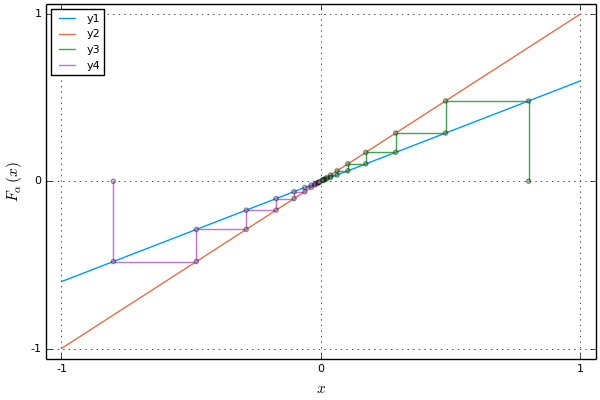

In [23]:
plot(-1:1/32:1, fα, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F_\alpha(x)")
plot!(-1:1/32:1, identity)
plot!(x1α, fx1α, marker=(:dot, 3, 0.4))
plot!(x2α, fx2α, marker=(:dot, 3, 0.4))

In [24]:
?cobweb_plot

search: cobweb_plot cobweb_plot!



```
    cobweb_plot(f::Function, x0, rangex, n)
```

Función que hace el mapeo tipo cobweb. Este se usa cuando el plot no se a definido.



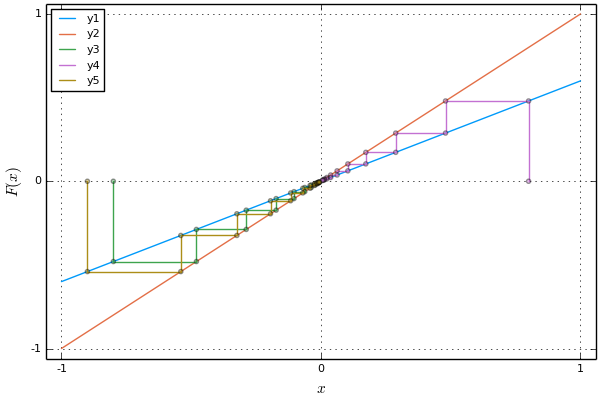

In [25]:
cobweb_plot(fα, -0.8, -1:1/32:1, 10)
cobweb_plot!(fα, 0.8, -1:1/32:1, 10)
cobweb_plot!(fα, -0.9, -1:1/32:1, 10)

In [26]:
fx1α[end], fx2α[end]

(0.004837294079999999,-0.004837294079999999)

Como puede observarse, los puntos *convergen*, o son atraídos al punto fijo $x^*=0$.

Consideremos ahora el caso $\alpha>1$.

In [27]:
const β = 2.2
fβ = x -> f(x, β)

(anonymous function)

In [28]:
x1β, fx1β = iteramapeo(fβ, 0.08, 8); 
x2β, fx2β = iteramapeo(fβ, -0.08, 8); 


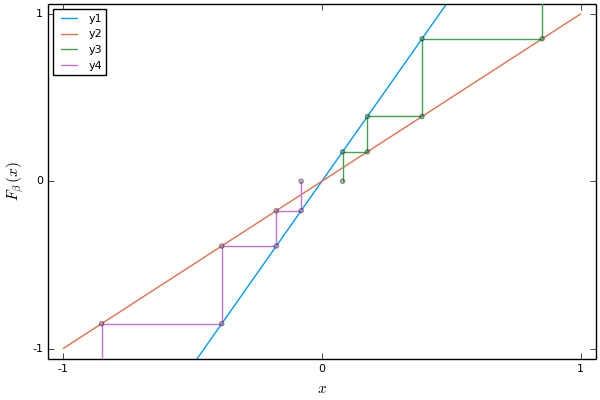

In [29]:
plot(-1:1/32:1, fβ, grid=:false, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\beta(x)", (-1.0, 1.0)))
plot!(-1:1/32:1, identity)
plot!(x1β, fx1β, marker=(:dot, 3, 0.4))
plot!(x2β, fx2β, marker=(:dot, 3, 0.4))


In [30]:
fx1β[end], fx2β[end]

(43.900698828800024,-43.900698828800024)

Claramente, los iterados de un punto cercano al punto fijo $x^*=0$ se alejan de él. Uno dice que el punto fijo los *repele*.

De igual manera podemos hacer el análisis para casos en que el parámetro sea negativo.

In [31]:
const γ = -0.6
fγ = x -> f(x, γ)

const δ = -1.2
fδ = x -> f(x, δ)

(anonymous function)

In [32]:
x1γ, fx1γ = iteramapeo(fγ, 0.8, 14); 
x1δ, fx1δ = iteramapeo(fδ, 0.08, 14); 

# xx = [x1γ x1δ];
# fxx = [fx1γ fx1δ];


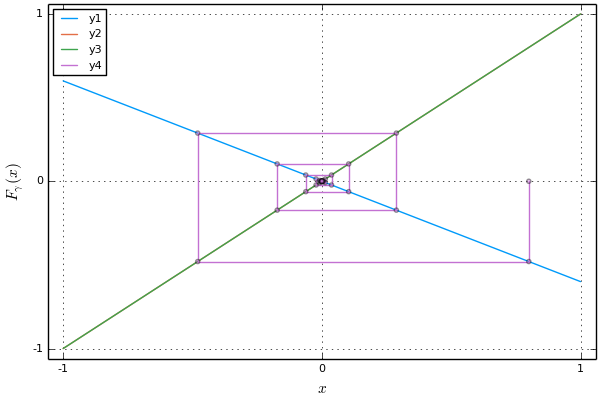

In [33]:
plot(-1:1/32:1, fγ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\gamma(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1γ, fx1γ, marker=(:dot, 3, 0.4))


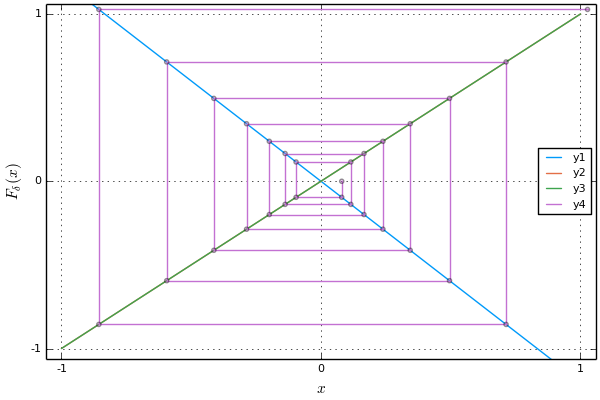

In [34]:
plot(-1:1/32:1, fδ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\delta(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1δ, fx1δ, marker=(:dot, 3, 0.4))


Claramente, la *magnitud* de la derivada en el punto fijo $|F'(x^*)|$ da información sobre el comportamiento local cerca del punto fijo. Así, *definimos* a un **punto fijo atractor** cuando $|F'(x^*)|<1$, y a un **punto fijo repulsor** cuando $|F'(x^*)|>1$. Dependiendo del signo uno puede decir que la convergencia (o divergencia) es *uniforme* (por el mismo lado)
si la derivada es positiva, o *alternante* (por ambos lados) si el signo es negativo.

Esto, en algún sentido aún ambiguo, es lo que significa que un punto fijo es *estable* o *inestable*.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [37]:
?cobweb_plot

search: cobweb_plot cobweb_plot!



```
    cobweb_plot(f::Function, x0, rangex, n)
```

Función que hace el mapeo tipo cobweb. Este se usa cuando el plot no se a definido.



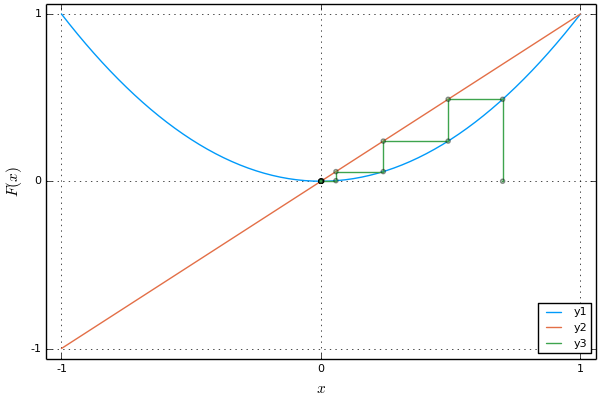

In [39]:
#Defino funcion
F1(x) = x^2

cobweb_plot(F1, 0.7, -1:1/32:1, 10)



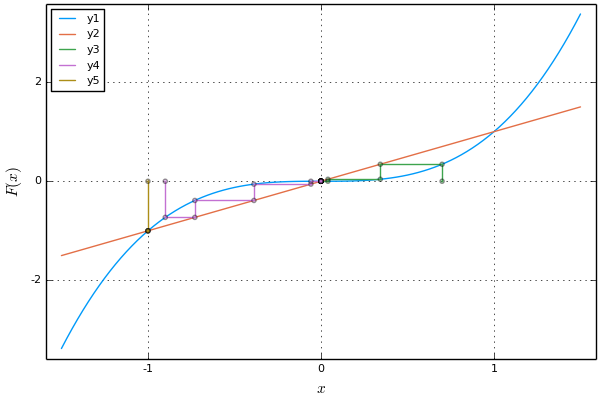

In [51]:
F2(x) = x^3

cobweb_plot(F2, 0.7, -1.5:1/32:1.5, 10)
cobweb_plot!(F2, -0.9, -1.5:1/32:1.5, 10)
cobweb_plot!(F2, -1, -1.5:1/32:1.5, 2)

In [ ]:
@gif 

In [53]:
F3(x) = -x^3

@gif for i in 1:40
    
    cobweb_plot(F3, 0.7, -1.5:1/32:1.5, i)
    cobweb_plot!(F3, -0.9, -1.5:1/32:1.5, i)
    cobweb_plot!(F3, -1, -1.5:1/32:1.5, i)
    
end every 1

INFO: Saved animation to /Users/claudiopierard/2017-1_TSFisComp/tareas/claudio/tmp.gif


Plots.AnimatedGif("/Users/claudiopierard/2017-1_TSFisComp/tareas/claudio/tmp.gif")

Para entender el comportamiento descrito anteriormente, usamos el **teorema del valor medio**:

Supongamos que $F$ es una función diferenciable en $[a,b]$. Entonces existe un valor $c\in[a,b]$ tal que la siguiente igualdad se cumple:

\begin{equation}
F'(c) = \frac{F(b)-F(a)}{b-a}.
\end{equation}


Con este resultado demostraremos:

**Teorema del punto fijo atractivo**

Supongamos que $x_0$ es un punto fijo atractivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ entonces $F^n(x)\in I$ *para toda* $n$, y además $F^n(x)\to x_0$ al $n\to\infty$.


**Teorema del punto fijo repulsivo**

Supongamos que $x_0$ es un punto fijo repulsivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ y $x\neq x_0$ entonces existe un entero $n>0$ tal que $F^n(x)\notin I$.

Los teoremas anteriores *muestran* que, numéricamente, los puntos fijos atractivos son sencillos de localizar, mientras que los repulsivos son, en algún sentido, invisibles numéricamente. Para el caso atractivo, si alguno de los iterados de una condición inicial aleatoria *entra* en $I$, tendremos convergencia al punto fijo, mientras que en el caso repulsivo debemos tener un iterado que se mapee *exactamente* en el punto fijo para caer en él. Y esto, en general, nunca ocurre.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

---

**Referencias:**

Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

